In [1]:
# Imprt packages
import pandas as pd

# Load data
# We'll look at the data from the Champions League match between FC Barcelona and Bayern Munich on 23 October 2024

df = pd.read_html(
    'https://fbref.com/en/matches/710ee5bb/Barcelona-Bayern-Munich-October-23-2024-Champions-League', 
    attrs={'id': 'shots_all'}
)[0]

In [2]:
df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
              Minute             Player              Squad                 xG   
0                1.0           Raphinha          Barcelona               0.78   
1                8.0         Harry Kane      Bayern Munich               0.14   
2               16.0         Harry Kane      Bayern Munich               0.01   
3               17.0       Serge Gnabry      Bayern Munich               0.03   
4               18.0         Harry Kane      Bayern Munich               0.46   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0 Unnamed: 7_level_0  \
                PSxG            Outcome           Distance          Body Part   
0               0.99               Goal                8.0          Left Foot   
1               0.15              Saved               22.0         Right Foot   
2               0.00         Off Target               15.0               Head   
3               0.03              Saved               18.0          Left Foot   
4               0.91               Goal                7.0         Right Foot   

  Unnamed: 8_level_0              SCA 1                       SCA 2  \
               Notes             Player        Event         Player   
0                NaN           Raphinha      Take-On          Pedri   
1                NaN  Raphaël Guerreiro  Pass (Live)  Michael Olise   
2                NaN      Thomas Müller  Pass (Live)   Serge Gnabry   
3                NaN     Joshua Kimmich  Pass (Live)  Michael Olise   
4             Volley       Serge Gnabry  Pass (Live)  Michael Olise   

                
         Event  
0  Pass (Live)  
1  Pass (Live)  
2  Pass (Live)  
3  Pass (Live)  
4  Pass (Live)

In [3]:
# Clean columns up
# First we will drop the SCA columns because they will mess up our column names
df = df.drop(columns=[x for x in df.columns if 'SCA' in x[0]])

df.columns = df.columns.droplevel(0)
df.columns

Index(['Minute', 'Player', 'Squad', 'xG', 'PSxG', 'Outcome', 'Distance',
       'Body Part', 'Notes'],
      dtype='object')

In [4]:
# Filter the columns we need
df = df[['Squad', 'Player', 'Minute', 'xG', 'Outcome']]
df.head()

,Squad,Player,Minute,xG,Outcome
0,Barcelona,Raphinha,1.0,0.78,Goal
1,Bayern Munich,Harry Kane,8.0,0.14,Saved
2,Bayern Munich,Harry Kane,16.0,0.01,Off Target
3,Bayern Munich,Serge Gnabry,17.0,0.03,Saved
4,Bayern Munich,Harry Kane,18.0,0.46,Goal


In [67]:
# Create a column for the cumulative xG for each team
df['cumulative_xG'] = df.groupby('Squad')['xG'].cumsum()
#Add last name column
df['last_name'] = df['Player'].str.split().str[-1]
df

,Squad,Player,Minute,xG,Outcome,cumulative_xG,Half,last_name
0,Barcelona,Raphinha,1,0.78,Goal,0.78,1,Raphinha
1,Bayern Munich,Harry Kane,8,0.14,Saved,0.14,1,Kane
2,Bayern Munich,Harry Kane,16,0.01,Off Target,0.15,1,Kane
3,Bayern Munich,Serge Gnabry,17,0.03,Saved,0.18,1,Gnabry
4,Bayern Munich,Harry Kane,18,0.46,Goal,0.64,1,Kane
5,Bayern Munich,Michael Olise,23,0.07,Blocked,0.71,1,Olise
6,Barcelona,Robert Lewandowski,25,0.06,Off Target,0.84,1,Lewandowski
7,Barcelona,Iñigo Martínez,29,0.05,Off Target,0.89,1,Martínez
8,Barcelona,Robert Lewandowski,36,0.70,Goal,1.59,1,Lewandowski
9,Barcelona,Raphinha,45,0.03,Goal,1.62,1,Raphinha


In [68]:
# Need to get the minute in a format that can be used to plot the flow chart
# First drop the nan values that FBREF uses as a divider
# Then cast to an int
df = df.dropna(subset=['Minute'])
df['Minute'] = df['Minute'].astype(int)
df['Minute']

0      1
1      8
2     16
3     17
4     18
5     23
6     25
7     29
8     36
9     45
11    50
12    50
13    56
14    58
15    62
16    66
17    72
18    78
19    80
20    80
21    80
22    80
23    88
Name: Minute, dtype: int64

In [69]:
#Adding half column
df['Half'] = df['Minute'].apply(lambda x: 1 if x <= 45 else 2).astype(int)
df

,Squad,Player,Minute,xG,Outcome,cumulative_xG,Half,last_name
0,Barcelona,Raphinha,1,0.78,Goal,0.78,1,Raphinha
1,Bayern Munich,Harry Kane,8,0.14,Saved,0.14,1,Kane
2,Bayern Munich,Harry Kane,16,0.01,Off Target,0.15,1,Kane
3,Bayern Munich,Serge Gnabry,17,0.03,Saved,0.18,1,Gnabry
4,Bayern Munich,Harry Kane,18,0.46,Goal,0.64,1,Kane
5,Bayern Munich,Michael Olise,23,0.07,Blocked,0.71,1,Olise
6,Barcelona,Robert Lewandowski,25,0.06,Off Target,0.84,1,Lewandowski
7,Barcelona,Iñigo Martínez,29,0.05,Off Target,0.89,1,Martínez
8,Barcelona,Robert Lewandowski,36,0.70,Goal,1.59,1,Lewandowski
9,Barcelona,Raphinha,45,0.03,Goal,1.62,1,Raphinha


Text(0.1, 0.0, 'data via FBref.com\n@KQAnalytics/twitter')

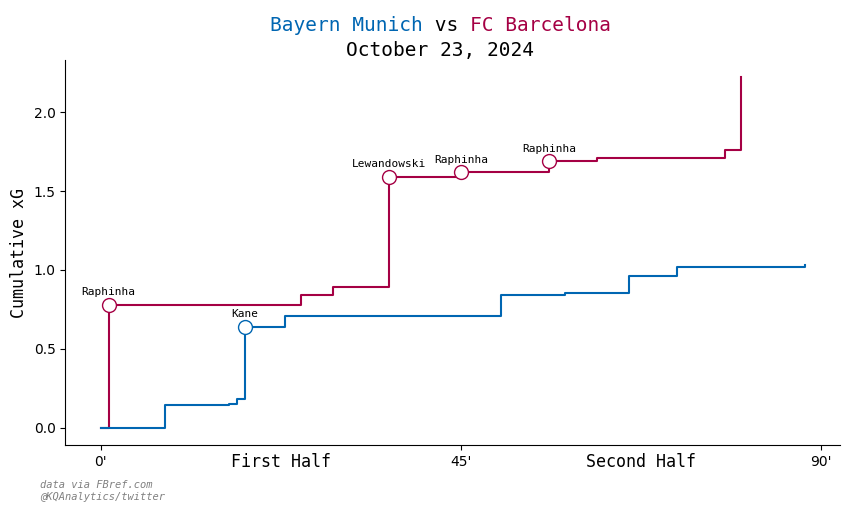

In [77]:
# Create the flow chart
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

# Plot the xG for each team by half
# Make it so the lines both start at 0

barca_color = '#a50044'
bayern_color = '#0066b2'

for team in df['Squad'].unique():
    
    team_df = df[df['Squad'] == team]
  
    # add a 0 xG row at the start of the match
    team_df = pd.concat([pd.DataFrame({'Squad': team, 'Minute': 0, 'xG': 0, 'Outcome': 'Off Target', 'cumulative_xG': 0, 'Half': 1}, index=[0]), team_df])

    # Also add a row at the beginning of the second half to make the lines start where the first half ended
    team_df = pd.concat([team_df[team_df['Half'] == 1], pd.DataFrame({'Squad': team, 'Minute': 45, 'xG': 0, 'Outcome': 'Off Target', 'cumulative_xG': team_df[team_df['Half'] == 1]['cumulative_xG'].iloc[-1], 'Half': 2}, index=[0]), team_df[team_df['Half'] == 2]])

    ax.plot(
        team_df['Minute'], 
        team_df['cumulative_xG'], 
        label=team, 
        drawstyle='steps-post',
        c= barca_color if team == 'Barcelona' else bayern_color
    )   


# Add a scatter plot to show the goals
for team in df['Squad'].unique():
    team_df = df[(df['Squad'] == team) & (df['Outcome'] == 'Goal')].to_dict(orient='records')
    for x in team_df:
        ax.scatter(
            x['Minute'], 
            x['cumulative_xG'], 
            c='white',
            edgecolor=barca_color if team == 'Barcelona' else bayern_color,
            s=100,
            # Want the goals to be on top of the lines
            zorder=5
        )
        
        # add a label to the goals for the player who scored
        ax.text(
            x['Minute'], 
            x['cumulative_xG'] + .08, 
            x['last_name'], 
            ha='center', 
            va='center', 
            fontfamily='monospace', 
            fontsize=8,
            zorder=10
        )
       
# Label the x axis with first and second half
ax.set_xticks([0, 45, 90])
ax.set_xticklabels(['0\'', '45\'', '90\''])

# Add the actual words "First Half" and "Second Half" to the plot under the x axis
ax.text(22.5, -.25, 'First Half', ha='center', fontfamily='monospace', fontsize=12)
ax.text(67.5, -.25, 'Second Half', ha='center', fontfamily='monospace', fontsize=12)

# Label the y axis with the cumulative xG
ax.set_ylabel('Cumulative xG', fontfamily='monospace', fontsize=12)

# Get rid of the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Change the color of the title to show which team is which using the highlight-text package
from highlight_text import fig_text

fig_text(
    0.5,
    0.95,
    '<Bayern Munich> vs <FC Barcelona>', 
    fontsize=14, 
    ha='center', 
    va='center', 
    ax=ax, 
    fontfamily='monospace', 
    highlight_textprops=[{'color': bayern_color}, {'color': barca_color}]
)

fig_text(
    0.5,
    0.9,
    'October 23, 2024', 
    fontsize=14, 
    ha='center', 
    va='center', 
    ax=ax, 
    fontfamily='monospace'
)


# Add a twitter @ to the bottom left of the plot
fig.text(
    0.1, 
    0.00, 
    'data via FBref.com\n@KQAnalytics/twitter', 
    fontsize=7.5, 
    fontstyle='oblique', 
    fontfamily='monospace', 
    color='gray'
)

In [78]:
# save the figure
fig.savefig('/Users/kevingquinn/Desktop/barca_bayern_xG_flowchart_23_Oct_2024.png', dpi=300, bbox_inches='tight')